In [7]:
import numpy as np
from keras.layers import Dense, Dropout, Input, Activation
from keras.models import Model, Sequential, load_model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import sklearn
from sklearn import svm
import pandas as pd

In [8]:
df=read_csv("drive/MyDrive/iisc_data/Exp_ProcessPlanner.csv")
xtrain=df[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytrain=df[['Ra']]
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)

In [3]:
print(xtrain.shape)
print(ytrain.shape)

(16, 6)
(16, 1)


In [4]:
df=read_csv("drive/MyDrive/iisc_data/Test_consolidated.csv")
xtest=df[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytest=df[['Ra']]
xtest=np.array(xtest)
ytest=np.array(ytest)

In [5]:
print(xtest.shape)
print(ytest.shape)

(16, 6)
(16, 1)


In [6]:
# Defining Parameters
C_arr = [0.1,1,10,100,1000]
eps_arr = [1,0.1,0.01,0.001,0.0001,0.00001]

In [13]:
# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','mae', 'mse']
for C in C_arr:
    for epsilon in eps_arr:
        model = svm.SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(xtrain, ytrain)
        yhat = model.predict(xtest)
        yhat = yhat.reshape((yhat.shape[0], 1))
        mae = mean_absolute_error(ytest, yhat)
        mse = mean_squared_error(ytest, yhat)

        # corr = stats.pearsonr(Y_test,Y_pred)[0]


        hyper_arr.append([C,epsilon,mae, mse])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['mse'], ascending=True)
hyper_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,c,epsilon,mae,mse
13,10.0,0.10000,0.776669,1.057915
14,10.0,0.01000,0.790016,1.092989
15,10.0,0.00100,0.793902,1.093120
17,10.0,0.00001,0.794294,1.093327
16,10.0,0.00010,0.794422,1.093637
10,1.0,0.00010,0.872605,1.201069
11,1.0,0.00001,0.872633,1.201093
9,1.0,0.00100,0.872462,1.201514
8,1.0,0.01000,0.871344,1.206990
5,0.1,0.00001,0.880308,1.235515


In [14]:
# Building SVR model with best parameters

model_svr = svm.SVR(kernel='rbf', C=10, epsilon=0.1) # set kernel and hyperparameters
svr = model_svr.fit(xtrain, ytrain)
yhat = model_svr.predict(xtest)
yhat = yhat.reshape((yhat.shape[0], 1))
mae = mean_absolute_error(ytest, yhat)
mse = mean_squared_error(ytest, yhat)

print(mae)
print(mse)

# print(yhat)
# print(ytest)

0.7766689114047931
1.0579150053937183


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


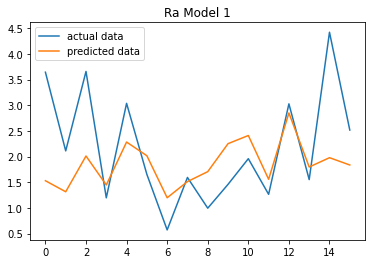

In [15]:
import matplotlib.pyplot as plt

plt.plot(ytest[:], label="actual data")
plt.plot(yhat[:], label="predicted data")
plt.title("Ra Model 1")
plt.legend()
plt.show()


In [16]:
import pickle
pickle.dump(model, open('drive/MyDrive/iisc_data/mode_2Ra_1.pkl', 'wb'))